In [13]:
# Importing Libraries

# libraries for data processing
import pandas as pd

# libraries for linear algebra
import numpy as np

# for visualization purpose
import matplotlib.pyplot as plt
%matplotlib inline

# import NLP libraries
import re
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdazeez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# read dataset from file
dataset = pd.read_csv("E:\\sample datasets\\SMSSpamCollection", '\t', names=['labels', 'message'] )

In [21]:
# reading the dataset lines
dataset.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [75]:
x_1 = dataset['message'][0]
x_1

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [16]:
ps = PorterStemmer()

In [66]:
# Cleaning the sentences , removing stopwords, and joining for analysis

corpus = []
for i in range(0, len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['message'][i])
    review = review.lower()
    review = review.split()
    reveiw =  [ ps.stem(word) for word in review if not word in stopwords.words('english')]
    review =  ' '.join(review)
    corpus.append(review)  


In [48]:
# import sklearn libraries for model training

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(dataset['labels'], drop_first=True )


In [49]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
y.head(5)

,spam
0,0
1,0
2,1
3,0
4,0


In [51]:
# train test model 

from sklearn.model_selection import train_test_split
X_train,  X_test, y_train,  y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
X_train.shape

(4457, 2500)

In [53]:
X_test.shape

(1115, 2500)

In [54]:
y.shape


(5572, 1)

In [55]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [56]:
y_pred = spam_detect_model.predict(X_test)

In [57]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [58]:
# import metrics to evaluate
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)
confusion_m

array([[960,   6],
       [  9, 140]], dtype=int64)

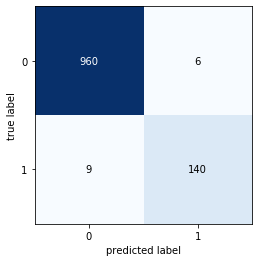

In [61]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion_m)
plt.show()

In [62]:
from sklearn.metrics import classification_report

In [65]:
# our model accuracy 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.96      0.94      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [82]:
# Our model can be compared with different ML methods to obtain an optimised model that can give high accuracy.

In [ ]:
# Other ML models that can be trained word2vec, ngram, keras Tensorflow RNN Lstm, GRU, etc. 